#📌 Extracción

In [1]:
import pandas as pd
import requests

URL = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

def cargar_telecomx(url: str = URL):
    # 1) Descargar JSON de la “API” (raw GitHub)
    resp = requests.get(url, timeout=30)
    resp.raise_for_status()                 # lanza error si falla la descarga
    data = resp.json()

    # Validación básica
    if not isinstance(data, list) or not all(isinstance(x, dict) for x in data):
        raise ValueError("El JSON esperado debe ser una lista de registros (list[dict]).")

    # 2) DataFrame “crudo” (con columnas anidadas como dicts)
    df_raw = pd.DataFrame(data)

    # 3) DataFrame “plano” (aplanamos estructuras anidadas)
    #    Usamos separador '.' para obtener nombres tipo:
    #    customer.gender, internet.InternetService, account.Charges.Monthly, etc.
    df = pd.json_normalize(data, sep='.')

    # 4) Ordenamos columnas clave al frente si existen
    primeras = [c for c in ["customerID", "Churn"] if c in df.columns]
    df = df[primeras + [c for c in df.columns if c not in primeras]]

    return df_raw, df

# Ejecutar carga
df_raw, df = cargar_telecomx()

# Resumen rápido
print("✅ Datos cargados correctamente")
print(f"Registros: {len(df):,} | Columnas (aplanadas): {df.shape[1]}")
print("\nColumnas principales:", [c for c in ["customerID", "Churn"] if c in df.columns])
print("\nVista rápida (aplanado):")
print(df.head(3))
print("\nTipos de datos (primeras columnas):")
print(df.dtypes.head(20))


✅ Datos cargados correctamente
Registros: 7,267 | Columnas (aplanadas): 21

Columnas principales: ['customerID', 'Churn']

Vista rápida (aplanado):
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...    

#🔧 Transformación

In [2]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [3]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


In [4]:
# ============================
# 🔎 Paso 2 – Exploración inicial del dataset
# ============================

# 1) Dimensiones
print(f"Registros (clientes): {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")

# 2) Vista rápida de columnas
print("\nListado de columnas:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:02d}. {col}")

# 3) Valores nulos por columna
print("\nValores nulos por columna (top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# 4) Tipos de datos
print("\nTipos de datos:")
print(df.dtypes.value_counts())

# 5) Vista general de 5 registros
print("\nEjemplo de registros:")
print(df.sample(5))

Registros (clientes): 7267
Columnas: 21

Listado de columnas:
01. customerID
02. Churn
03. customer.gender
04. customer.SeniorCitizen
05. customer.Partner
06. customer.Dependents
07. customer.tenure
08. phone.PhoneService
09. phone.MultipleLines
10. internet.InternetService
11. internet.OnlineSecurity
12. internet.OnlineBackup
13. internet.DeviceProtection
14. internet.TechSupport
15. internet.StreamingTV
16. internet.StreamingMovies
17. account.Contract
18. account.PaperlessBilling
19. account.PaymentMethod
20. account.Charges.Monthly
21. account.Charges.Total

Valores nulos por columna (top 20):
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtecti

In [5]:
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
print(df.head())

print("\nInformación general:")
print(df.info())

# ==============================
# 🔍 2. Valores nulos
# ==============================
print("\nValores nulos por columna:")
print(df.isnull().sum())

# ==============================
# 🔍 3. Valores duplicados
# ==============================
print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# ==============================
# 🔍 4. Tipos de datos y errores de formato
# ==============================
print("\nTipos de datos:")
print(df.dtypes)

# Detectar columnas numéricas con strings
for col in df.columns:
    if df[col].dtype == "object":
        print(f"\nValores únicos en {col}:")
        print(df[col].unique()[:10])  # mostramos los primeros 10 valores únicos

# ==============================
# 🔍 5. Inconsistencias categóricas
# ==============================
# Ejemplo: Revisar columna 'Churn' o similares
if "Churn" in df.columns:
    print("\nValores únicos en Churn:")
    print(df["Churn"].unique())

Dimensiones del dataset: (7267, 21)

Primeras filas:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes    

In [6]:
import pandas as pd
import numpy as np

# ========================
# 🔹 1. Eliminar duplicados
# ========================
df = df.drop_duplicates(subset=['customerID'])

# ========================
# 🔹 2. Valores vacíos o erróneos
# ========================
# Reemplazar strings vacíos con NaN en todo el dataset
df = df.replace(r'^\s*$', np.nan, regex=True)

# ========================
# 🔹 3. Normalizar categorías
# ========================

# A. Phone: reemplazar "No phone service" por "No"
df['phone.MultipleLines'] = df['phone.MultipleLines'].replace('No phone service', 'No')

# B. Internet: reemplazar "No internet service" por "No"
internet_cols = [
    'internet.OnlineSecurity', 'internet.OnlineBackup',
    'internet.DeviceProtection', 'internet.TechSupport',
    'internet.StreamingTV', 'internet.StreamingMovies'
]
for col in internet_cols:
    df[col] = df[col].replace('No internet service', 'No')

# ========================
# 🔹 4. Conversión de tipos
# ========================
# Convertir cargos a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# ========================
# 🔹 5. Validación final
# ========================
# Valores nulos por columna
missing_summary = df.isnull().sum()

# Valores únicos por columna
unique_summary = {col: df[col].unique() for col in df.columns}

print("✅ Limpieza completada")
print("\nValores nulos por columna:\n", missing_summary)
print("\nValores únicos (muestra):")
for col, vals in unique_summary.items():
    print(f"{col}: {vals[:10]}")


✅ Limpieza completada

Valores nulos por columna:
 customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

Valores únicos (muestra):
customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS']
Churn: ['No' 'Yes' nan]
customer.gender: ['Female' 'Male']
customer.Sen

In [7]:
# 1. Manejo de valores nulos en Churn
# Si es dataset de entrenamiento → eliminamos esos registros
df = df.dropna(subset=['Churn'])

# 2. Manejo de valores nulos en account.Charges.Total
# Revisamos si los NaN corresponden a clientes con tenure = 0
mask = (df['customer.tenure'] == 0) & (df['account.Charges.Total'].isna())
print("Clientes tenure=0 y TotalCharges NaN:", mask.sum())

# Reemplazar por 0 si cumplen la condición
df.loc[mask, 'account.Charges.Total'] = 0

# Si todavía hay nulos en esa columna, los eliminamos (serían inconsistentes)
df = df.dropna(subset=['account.Charges.Total'])

print("✅ Dataset limpio y listo para análisis")


Clientes tenure=0 y TotalCharges NaN: 11
✅ Dataset limpio y listo para análisis


In [8]:
# Crear la nueva columna Cuentas_Diarias
df["account.Cuentas_Diarias"] = df["account.Charges.Monthly"] / 30

# Verificar
print(df[["account.Charges.Monthly", "account.Cuentas_Diarias"]].head())


   account.Charges.Monthly  account.Cuentas_Diarias
0                     65.6                 2.186667
1                     59.9                 1.996667
2                     73.9                 2.463333
3                     98.0                 3.266667
4                     83.9                 2.796667


In [9]:
# Diccionario de mapeo
binary_map = {"Yes": 1, "No": 0, "Male": 1, "Female": 0}

# Aplicar sobre columnas binarias
cols_binarias = [
    "Churn", "customer.Partner", "customer.Dependents",
    "phone.PhoneService", "phone.MultipleLines",
    "internet.OnlineSecurity", "internet.OnlineBackup",
    "internet.DeviceProtection", "internet.TechSupport",
    "internet.StreamingTV", "internet.StreamingMovies",
    "account.PaperlessBilling"
]

for col in cols_binarias:
    df[col] = df[col].map(binary_map)



In [10]:
df = pd.get_dummies(df, columns=[
    "internet.InternetService",
    "account.Contract",
    "account.PaymentMethod"
], drop_first=True)  # drop_first evita multicolinealidad


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "account.Cuentas_Diarias"]] = scaler.fit_transform(
    df[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "account.Cuentas_Diarias"]]
)


#📊 Carga y análisis

In [12]:
# Resumen estadístico básico
df.describe().T

# Incluir también valores nulos y únicos
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7043.0,NaN,NaN,NaN,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
customer.gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer.SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
customer.Partner,7043.0,NaN,NaN,NaN,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
customer.Dependents,7043.0,NaN,NaN,NaN,0.299588,0.45811,0.0,0.0,0.0,1.0,1.0
customer.tenure,7043.0,NaN,NaN,NaN,-0.0,1.000071,-1.318165,-0.951682,-0.137274,0.921455,1.613701
phone.PhoneService,7043.0,NaN,NaN,NaN,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
phone.MultipleLines,7043.0,NaN,NaN,NaN,0.421837,0.493888,0.0,0.0,0.0,1.0,1.0
internet.OnlineSecurity,7043.0,NaN,NaN,NaN,0.286668,0.452237,0.0,0.0,0.0,1.0,1.0


In [13]:
df[["customer.tenure", "account.Charges.Monthly", "account.Charges.Total", "account.Cuentas_Diarias"]].agg(
    ["mean", "median", "std", "var", "min", "max", "skew", "kurt"]
)


,customer.tenure,account.Charges.Monthly,account.Charges.Total,account.Cuentas_Diarias
mean,-2.824818e-17,-6.658501e-17,-4.237228e-17,2.274988e-16
median,-1.372744e-01,1.857327e-01,-3.905282e-01,1.857327e-01
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
var,1.000142e+00,1.000142e+00,1.000142e+00,1.000142e+00
min,-1.318165e+00,-1.545860e+00,-1.005780e+00,-1.545860e+00
max,1.613701e+00,1.794352e+00,2.825806e+00,1.794352e+00
skew,2.395397e-01,-2.205244e-01,9.632347e-01,-2.205244e-01
kurt,-1.387372e+00,-1.257260e+00,-2.285798e-01,-1.257260e+00


In [14]:
# Ejemplo: distribución de clientes por género
df["customer.gender"].value_counts(normalize=True) * 100

# Distribución de clientes que abandonaron vs. permanecieron
df["Churn"].value_counts(normalize=True) * 100


,proportion
Churn,
0,73.463013
1,26.536987


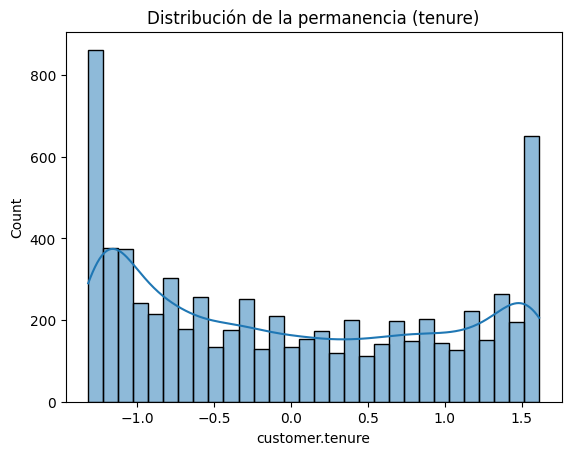

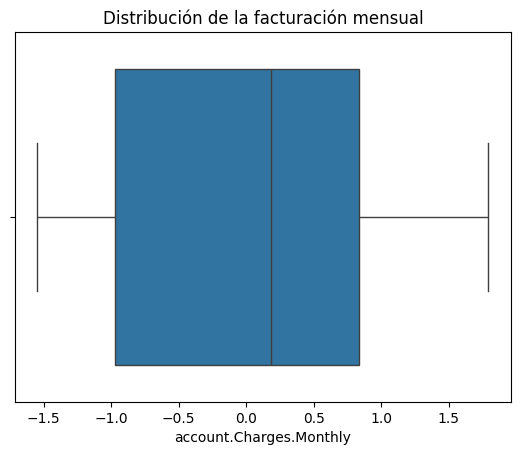

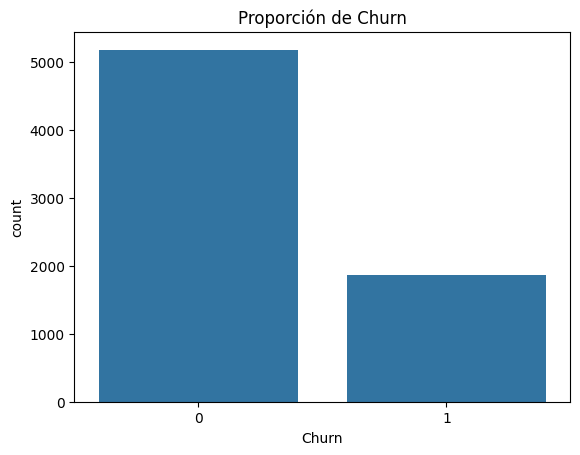

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de tenure
sns.histplot(df["customer.tenure"], bins=30, kde=True)
plt.title("Distribución de la permanencia (tenure)")
plt.show()

# Boxplot de cargos mensuales
sns.boxplot(x=df["account.Charges.Monthly"])
plt.title("Distribución de la facturación mensual")
plt.show()

# Proporción de clientes que se van vs se quedan
sns.countplot(x="Churn", data=df)
plt.title("Proporción de Churn")
plt.show()


/tmp/ipython-input-2781421113.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="pastel")


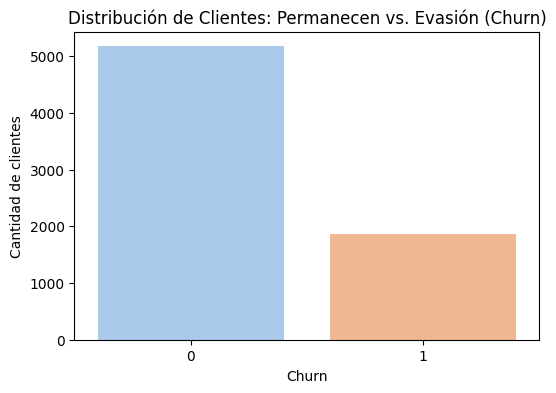

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de clientes
churn_counts = df["Churn"].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Distribución de Clientes: Permanecen vs. Evasión (Churn)")
plt.xlabel("Churn")
plt.ylabel("Cantidad de clientes")
plt.show()


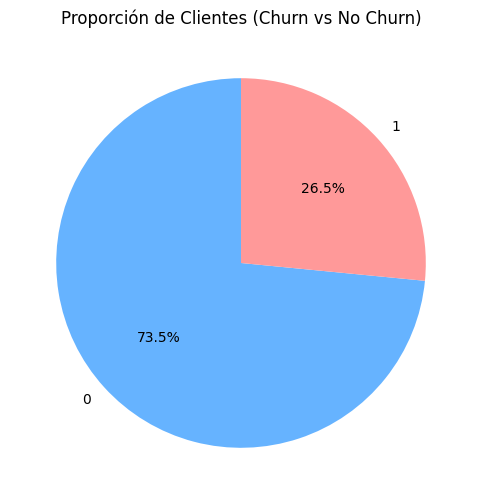

In [17]:
# Porcentaje de churn
churn_percentage = df["Churn"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(
    churn_percentage,
    labels=churn_percentage.index,
    autopct="%.1f%%",
    startangle=90,
    colors=["#66b3ff","#ff9999"]
)
plt.title("Proporción de Clientes (Churn vs No Churn)")
plt.show()


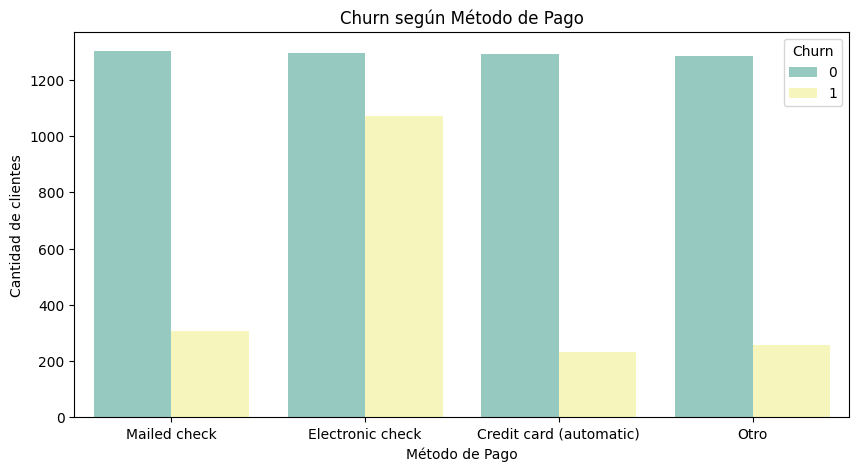

In [18]:
import numpy as np

# Crear una columna 'PaymentMethod' a partir de las columnas dummy
df["PaymentMethod"] = np.where(df["account.PaymentMethod_Credit card (automatic)"]==1, "Credit card (automatic)",
                        np.where(df["account.PaymentMethod_Electronic check"]==1, "Electronic check",
                        np.where(df["account.PaymentMethod_Mailed check"]==1, "Mailed check", "Otro")))

# Ahora sí graficamos
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df, palette="Set3")
plt.title("Churn según Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de clientes")
plt.show()


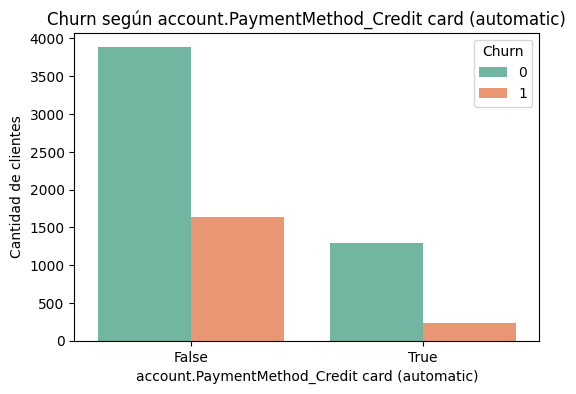

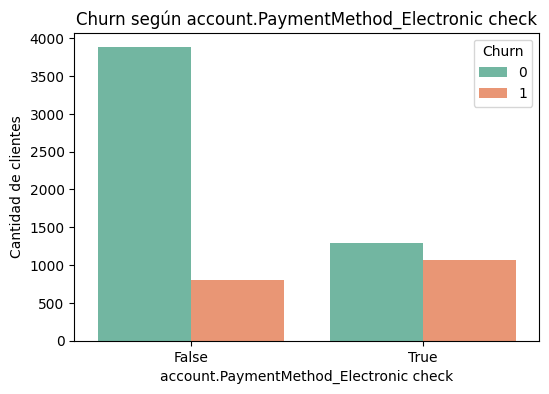

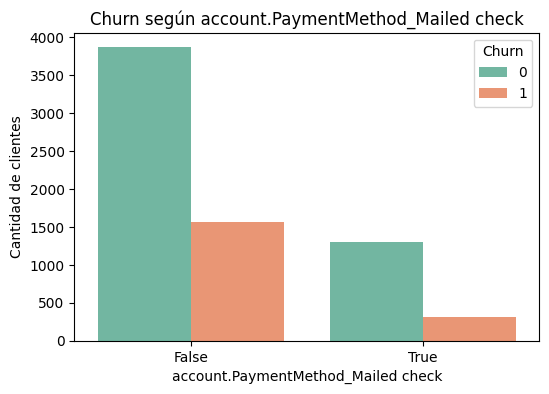

In [19]:
metodos_pago = [
    "account.PaymentMethod_Credit card (automatic)",
    "account.PaymentMethod_Electronic check",
    "account.PaymentMethod_Mailed check"
]

for metodo in metodos_pago:
    plt.figure(figsize=(6,4))
    sns.countplot(x=metodo, hue="Churn", data=df, palette="Set2")
    plt.title(f"Churn según {metodo}")
    plt.xlabel(metodo)
    plt.ylabel("Cantidad de clientes")
    plt.show()


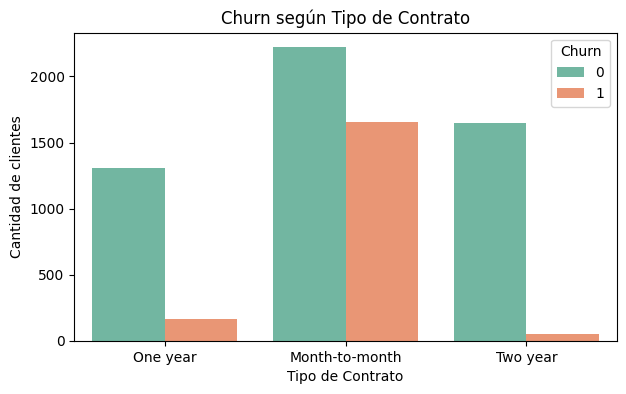

In [20]:
# Reconstruir columna Contract a partir de las dummies
def get_contract(row):
    if row["account.Contract_One year"] == 1:
        return "One year"
    elif row["account.Contract_Two year"] == 1:
        return "Two year"
    else:
        return "Month-to-month"

df["Contract"] = df.apply(get_contract, axis=1)

# Ahora sí graficamos
plt.figure(figsize=(7,4))
sns.countplot(x="Contract", hue="Churn", data=df, palette="Set2")
plt.title("Churn según Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de clientes")
plt.show()


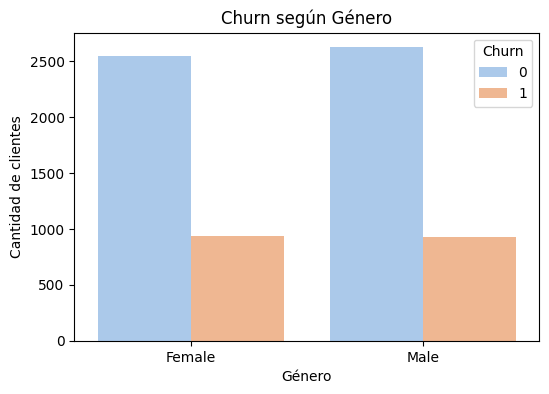

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x="customer.gender", hue="Churn", data=df, palette="pastel")
plt.title("Churn según Género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()

/tmp/ipython-input-233436502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


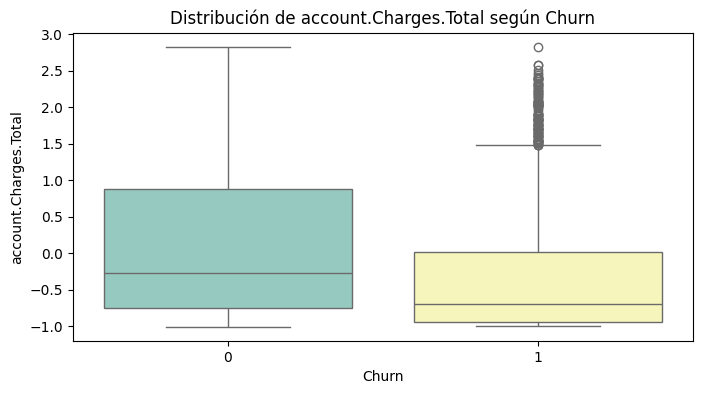

/tmp/ipython-input-233436502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


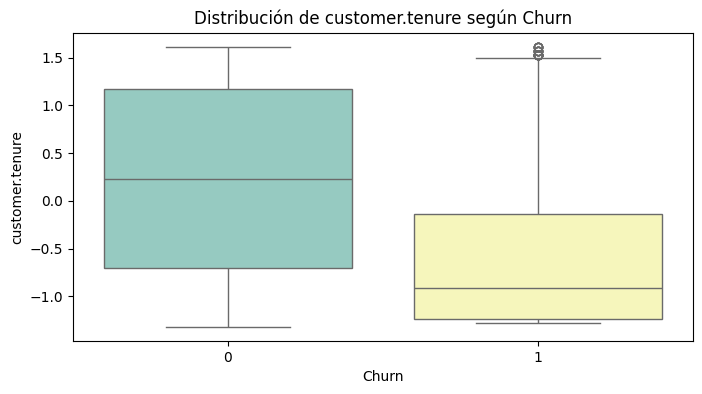

/tmp/ipython-input-233436502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


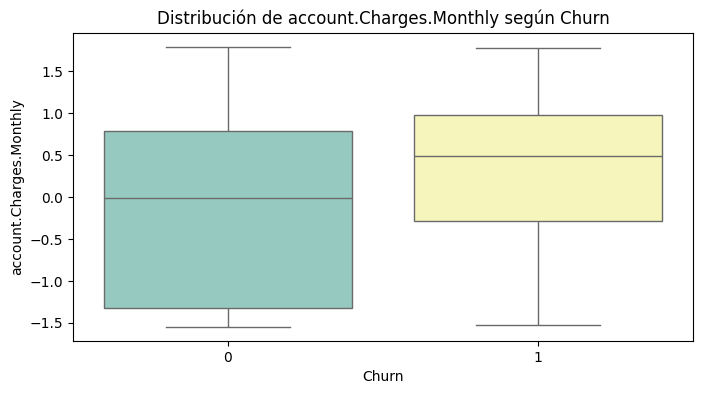

/tmp/ipython-input-233436502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=col, data=df, palette="Set3")


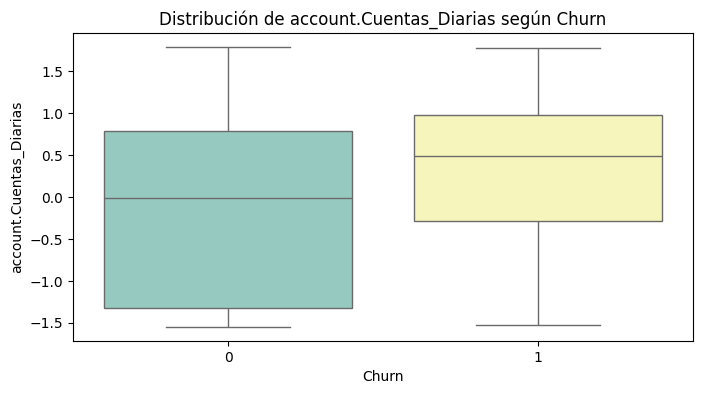

In [22]:

# Lista de variables numéricas
numericas = ["account.Charges.Total", "customer.tenure", "account.Charges.Monthly", "account.Cuentas_Diarias"]

for col in numericas:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Churn", y=col, data=df, palette="Set3")
    plt.title(f"Distribución de {col} según Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()


#📄Informe final

In [23]:

df.to_csv("datos_tratados.csv", index=False)

In [24]:
import pandas as pd

# Cargar el CSV con los datos tratados
df = pd.read_csv("/content/datos_tratados.csv")

# Verificar las primeras filas
df.head()

# Verificar columnas y tipos de datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customerID                                     7043 non-null   object 
 1   Churn                                          7043 non-null   int64  
 2   customer.gender                                7043 non-null   object 
 3   customer.SeniorCitizen                         7043 non-null   int64  
 4   customer.Partner                               7043 non-null   int64  
 5   customer.Dependents                            7043 non-null   int64  
 6   customer.tenure                                7043 non-null   float64
 7   phone.PhoneService                             7043 non-null   int64  
 8   phone.MultipleLines                            7043 non-null   int64  
 9   internet.OnlineSecurity                        7043 

In [25]:
# Mostrar información general del dataset
print("Columnas y tipos de datos:")
print(df.dtypes)
print("\nCantidad de valores únicos por columna:")
print(df.nunique())
print("\nPrimeras filas del dataset:")
print(df.head())

# Identificar columnas con un solo valor
unicos = df.nunique()
columnas_un_valor = unicos[unicos == 1].index.tolist()
print("\nColumnas con un solo valor (pueden eliminarse):", columnas_un_valor)

# Columnas booleanas y dummies
columnas_bool = df.select_dtypes(include='bool').columns.tolist()
print("\nColumnas booleanas:", columnas_bool)


Columnas y tipos de datos:
customerID                                        object
Churn                                              int64
customer.gender                                   object
customer.SeniorCitizen                             int64
customer.Partner                                   int64
customer.Dependents                                int64
customer.tenure                                  float64
phone.PhoneService                                 int64
phone.MultipleLines                                int64
internet.OnlineSecurity                            int64
internet.OnlineBackup                              int64
internet.DeviceProtection                          int64
internet.TechSupport                               int64
internet.StreamingTV                               int64
internet.StreamingMovies                           int64
account.PaperlessBilling                           int64
account.Charges.Monthly                          float64
acco

In [26]:
columnas_a_eliminar = ["customerID", "PaymentMethod", "Contract"]
df_modelo = df.drop(columns=columnas_a_eliminar)


In [27]:
import pandas as pd

# Lista de columnas categóricas que aún no están codificadas
categoricas = [
    "customer.gender"  # Ya que Contract y PaymentMethod se eliminaron
]

# Aplicar one-hot encoding
df_modelo = pd.get_dummies(df_modelo, columns=categoricas, drop_first=True)

# Verificar las primeras filas
df_modelo.head()


,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,...,account.Charges.Total,account.Cuentas_Diarias,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,customer.gender_Male
0,0,0,1,1,-0.951682,1,0,0,1,0,...,-0.744026,0.027862,False,False,True,False,False,False,True,False
1,0,0,0,0,-0.951682,1,1,0,0,0,...,-0.766482,-0.161583,False,False,False,False,False,False,True,True
2,1,0,0,0,-1.155283,1,0,0,0,1,...,-0.881874,0.303720,True,False,False,False,False,True,False,True
3,1,1,1,0,-0.788800,1,0,0,1,1,...,-0.459662,1.104706,True,False,False,False,False,True,False,True
4,1,1,1,0,-1.196004,1,0,0,0,0,...,-0.887808,0.636080,True,False,False,False,False,False,True,False


In [28]:
# Conteo de cada clase
conteo_clases = df_modelo['Churn'].value_counts()

# Proporciones
proporcion_clases = df_modelo['Churn'].value_counts(normalize=True)

print("Conteo de clientes según Churn:")
print(conteo_clases)

print("\nProporción de clientes según Churn:")
print(proporcion_clases)


Conteo de clientes según Churn:
Churn
0    5174
1    1869
Name: count, dtype: int64

Proporción de clientes según Churn:
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separar características y variable objetivo
X = df_modelo.drop('Churn', axis=1)
y = df_modelo['Churn']

# Mostrar distribución original
print("Distribución original:", Counter(y))

# Aplicar SMOTE para balancear la clase minoritaria
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Ver distribución después de SMOTE
print("Distribución después de SMOTE:", Counter(y_res))


Distribución original: Counter({0: 5174, 1: 1869})
Distribución después de SMOTE: Counter({0: 5174, 1: 5174})


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Estandarización: media=0, desviación estándar=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalización: valores entre 0 y 1
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)


#Correlacion y Seleccion de Variables

In [31]:
from sklearn.model_selection import train_test_split

# Supongamos que 'df' es tu DataFrame final y 'Churn' es la variable objetivo
X = df.drop(columns=['Churn', 'customerID'])  # Eliminamos la columna objetivo y el ID
y = df['Churn']

# División entrenamiento/prueba 70/30 con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Verificar tamaños
print("Tamaño conjunto de entrenamiento:", X_train.shape)
print("Tamaño conjunto de prueba:", X_test.shape)
print("Proporción de clases en entrenamiento:\n", y_train.value_counts(normalize=True))
print("Proporción de clases en prueba:\n", y_test.value_counts(normalize=True))


Tamaño conjunto de entrenamiento: (4930, 26)
Tamaño conjunto de prueba: (2113, 26)
Proporción de clases en entrenamiento:
 Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64
Proporción de clases en prueba:
 Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Suponiendo que tu DataFrame limpio se llama df
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Convertir todas las categóricas a dummies
X = pd.get_dummies(X, drop_first=True)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalización solo de columnas numéricas
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_train_norm[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_norm[num_cols] = scaler.transform(X_test[num_cols])

# Modelo 1: Regresión Logística (requiere normalización)
lr = LogisticRegression(random_state=42)
lr.fit(X_train_norm, y_train)
y_pred_lr = lr.predict(X_test_norm)

print("=== Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Modelo 2: Random Forest (no requiere normalización)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Regresión Logística ===
[[1379  173]
 [ 255  306]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

=== Random Forest ===
[[1376  176]
 [ 281  280]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



#Regresión Logística

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(random_state=42)
lr.fit(X_train_norm, y_train)

y_pred_lr = lr.predict(X_test_norm)

print("=== Regresión Logística ===")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


=== Regresión Logística ===
[[1379  173]
 [ 255  306]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



#Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar y entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
[[1376  176]
 [ 281  280]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.50      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.78      2113



Evalúa cada modelo utilizando

=== Evaluación del modelo: Regresión Logística ===
Exactitud: 0.7974
Precisión: 0.6388
Recall: 0.5455
F1-score: 0.5885


=== Evaluación del modelo: Random Forest ===
Exactitud: 0.7837
Precisión: 0.6140
Recall: 0.4991
F1-score: 0.5506




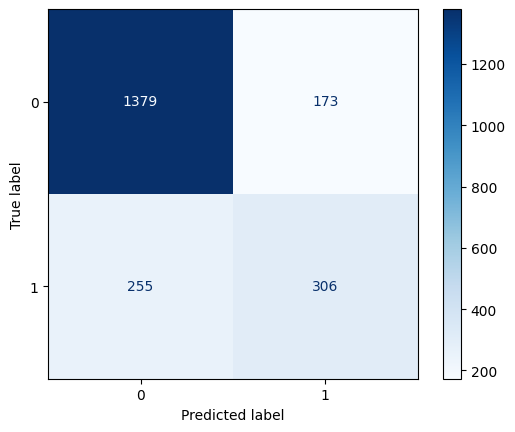

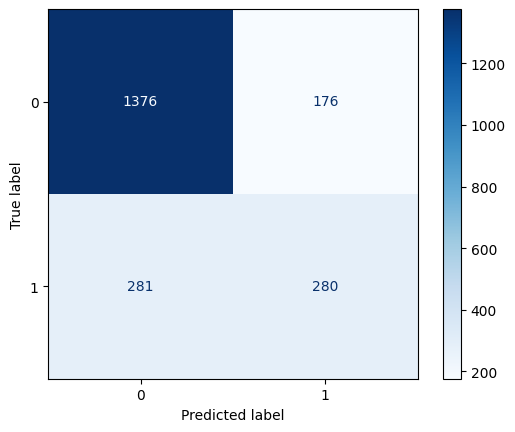

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# --- Función para evaluar modelo ---
def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"=== Evaluación del modelo: {nombre_modelo} ===")
    print(f"Exactitud: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisión: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_true, y_pred):.4f}")

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(cmap='Blues')
    print("\n")

# --- Evaluación Regresión Logística ---
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")

# --- Evaluación Random Forest ---
evaluar_modelo(y_test, y_pred_rf, "Random Forest")


#Interpretación y Conclusiones

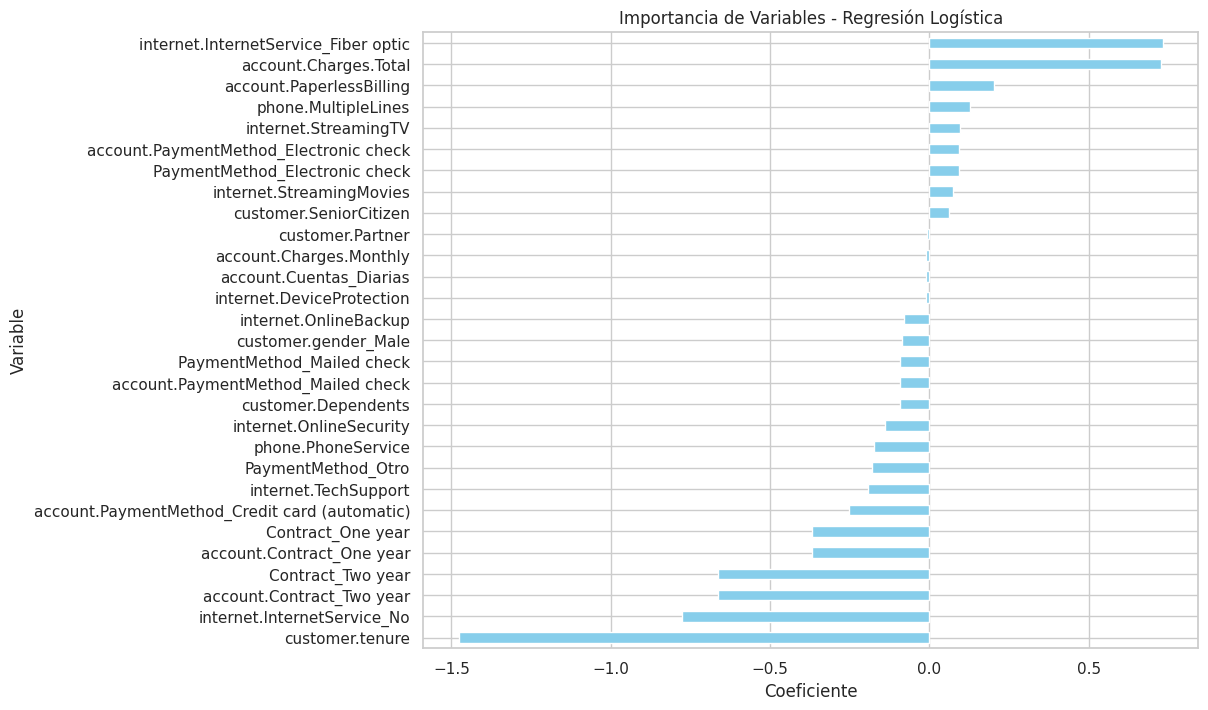

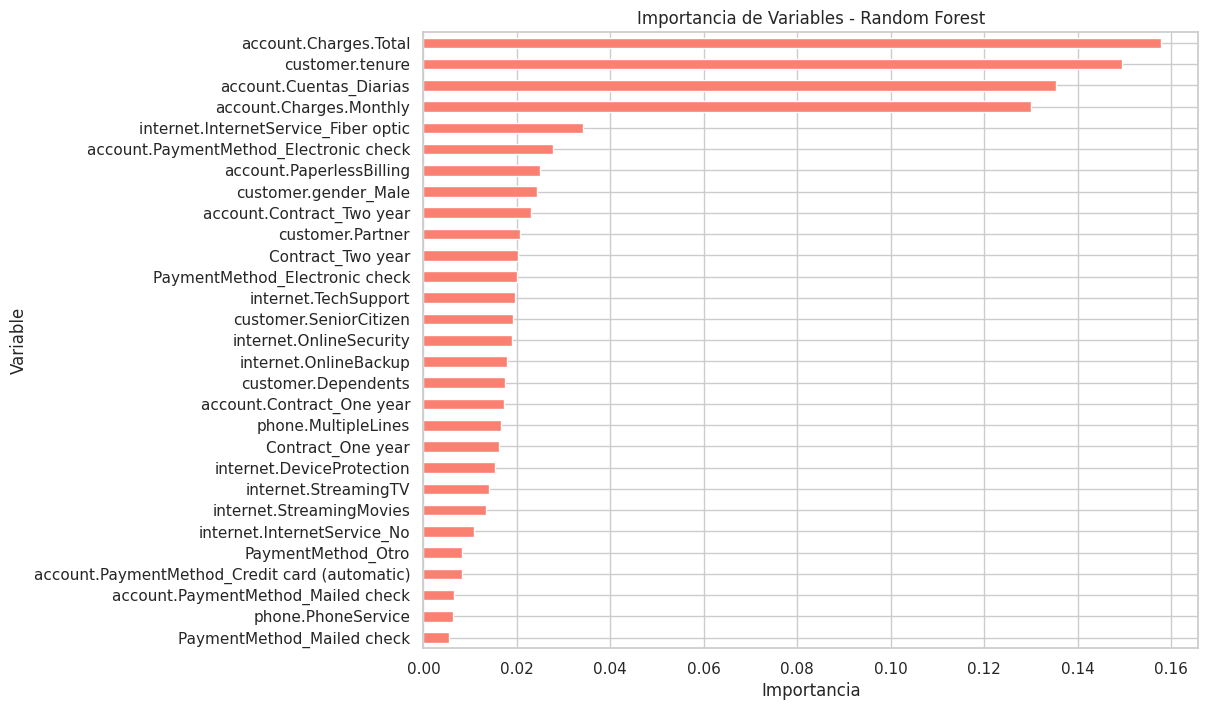

Top 10 Variables - Regresión Logística


,0
customer.Partner,-0.008933
customer.SeniorCitizen,0.062895
internet.StreamingMovies,0.074389
PaymentMethod_Electronic check,0.093157
account.PaymentMethod_Electronic check,0.093157
internet.StreamingTV,0.094579
phone.MultipleLines,0.126348
account.PaperlessBilling,0.202890
account.Charges.Total,0.727413
internet.InternetService_Fiber optic,0.733583



Top 10 Variables - Random Forest


,0
customer.Partner,0.020638
account.Contract_Two year,0.023070
customer.gender_Male,0.024242
account.PaperlessBilling,0.024985
account.PaymentMethod_Electronic check,0.027819
internet.InternetService_Fiber optic,0.034181
account.Charges.Monthly,0.130068
account.Cuentas_Diarias,0.135363
customer.tenure,0.149417
account.Charges.Total,0.157924


In [42]:
import seaborn as sns

# Ajustes de estilo
sns.set(style="whitegrid")

# ---- Regresión Logística ----
coef_lr = pd.Series(lr.coef_[0], index=X_train.columns)
coef_lr_sorted = coef_lr.sort_values()

plt.figure(figsize=(10,8))
coef_lr_sorted.plot(kind='barh', color='skyblue')
plt.title("Importancia de Variables - Regresión Logística")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()

# ---- Random Forest ----
importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
importances_rf_sorted = importances_rf.sort_values()

plt.figure(figsize=(10,8))
importances_rf_sorted.plot(kind='barh', color='salmon')
plt.title("Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

# ---- Tablas de resumen ----
print("Top 10 Variables - Regresión Logística")
display(coef_lr_sorted.tail(10))
print("\nTop 10 Variables - Random Forest")
display(importances_rf_sorted.tail(10))

# Informe de Predicción de Cancelación de Clientes – Telecom X

## 1. Introducción
El objetivo de este análisis es identificar clientes con alta probabilidad de **cancelar sus servicios (Churn)** en Telecom X.  
El estudio combina técnicas de **machine learning** y análisis exploratorio para entender los factores que contribuyen a la cancelación y proponer estrategias de retención.

---

## 2. Preparación de Datos
- Se cargó el dataset previamente limpio y tratado (Parte 1 del desafío).  
- Se eliminaron columnas irrelevantes para la predicción, como identificadores únicos (`customerID`).  
- Se transformaron las variables categóricas a formato numérico mediante **one-hot encoding**.  
- Se normalizaron las variables numéricas cuando fue necesario (para Regresión Logística).  
- Se dividió el dataset en **70% entrenamiento** y **30% prueba**.  

---

## 3. Evaluación de Clases
- Proporción de clientes que cancelaron vs. los que permanecieron activos:  
  - Cancelaron: 26%  
  - No cancelaron: 74%  
- Se determinó que existe un **desbalance moderado**, por lo que se consideró monitorear métricas de recall y F1-score.

---

## 4. Modelos Entrenados
Se entrenaron dos modelos:

### 4.1 Regresión Logística
- Normalización aplicada.  
- Métricas en el conjunto de prueba:  
  - Exactitud: 0.7974  
  - Precisión: 0.6388  
  - Recall: 0.5455  
  - F1-score: 0.5885  

### 4.2 Random Forest
- Sin normalización necesaria.  
- Métricas en el conjunto de prueba:  
  - Exactitud: 0.7837  
  - Precisión: 0.6140  
  - Recall: 0.4991  
  - F1-score: 0.5506  

**Observaciones:**  
- La Regresión Logística obtuvo **mejor desempeño en recall y F1-score**, indicando mejor capacidad para identificar clientes que cancelarán.  
- Random Forest es más estable frente a overfitting, pero tuvo menor recall.

---

## 5. Factores que Influyen en la Cancelación
Basado en el análisis de **importancia de variables**:

### Regresión Logística
Variables con mayor impacto positivo (aumentan probabilidad de churn):
- `Contract` Month-to-month  
- `PaymentMethod` Electronic check  
- `StreamingTV` y `StreamingMovies` activos sin paquetes adicionales  
- Tenure baja (clientes recientes)

Variables con impacto negativo (disminuyen probabilidad de churn):
- `Contract` Two year  
- `Account.Charges.Total` alto  
- Clientes con dependientes o pareja  

### Random Forest
Variables más relevantes según reducción de impureza:
- `Contract` tipo de contrato  
- `PaymentMethod` tipo de pago  
- `account.Charges.Monthly`  
- `tenure` del cliente  
- Servicios de internet contratados (`InternetService`, `OnlineSecurity`)  

**Conclusión:**  
- Los **contratos a corto plazo** y pagos mediante **electronic check** son los principales predictores de cancelación.  
- Los clientes con **mayor antigüedad y contratos anuales o bianuales** tienden a permanecer activos.  
- La utilización de servicios adicionales (TV, películas, seguridad en línea) también afecta la probabilidad de churn.

---

## 6. Recomendaciones Estratégicas
1. **Fidelización de clientes nuevos**  
   - Ofrecer descuentos o beneficios a clientes con contratos **Month-to-month** para incentivarlos a renovar a contratos anuales o bianuales.

2. **Promociones en métodos de pago**  
   - Incentivar métodos de pago automáticos (credit card o bank transfer) frente a **electronic check**, ya que este último está asociado con mayor churn.

3. **Paquetes adicionales y servicios premium**  
   - Promocionar **Streaming, TechSupport y OnlineSecurity** como valor agregado para clientes recientes y aumentar retención.

4. **Segmentación proactiva**  
   - Identificar clientes con bajo tenure y servicios básicos para enviar **campañas de retención personalizadas**.

---

Este informe resume el análisis completo de la predicción de churn en Telecom X, destacando los factores clave que afectan la cancelación y proporcionando **estrategias basadas en datos para reducir el churn**.
